# Loading the Data-Set and Viewing it

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("used_device_data.csv")
df.head(3)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631


In [61]:
df.tail(3)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [62]:
# Checking the Missing values 
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are some Missing values in the Dataset  Let's plot the graph and Fix it

9.460207633587787


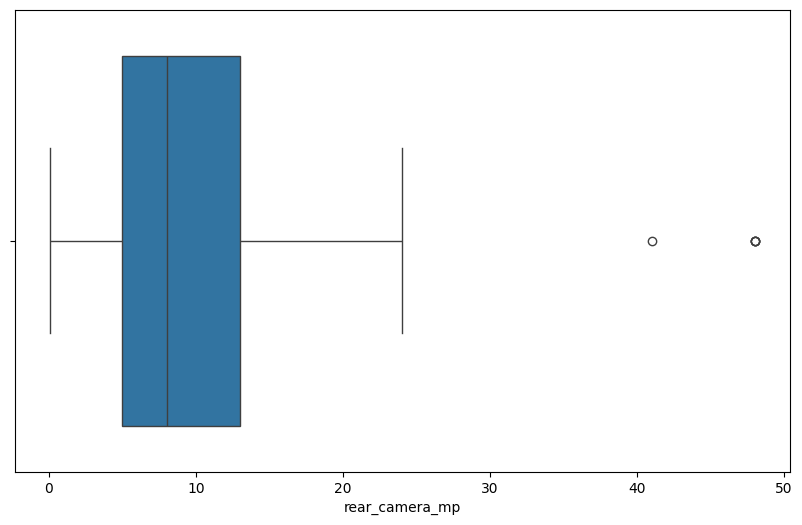

In [63]:
# Dealing with missing values --> Checking the Mean of the rear_camera_mp to fix the value
plt.figure(figsize=(10,6))
sns.boxplot(x='rear_camera_mp', data=df)
mean_rear = df['rear_camera_mp'].mean()
print(mean_rear)


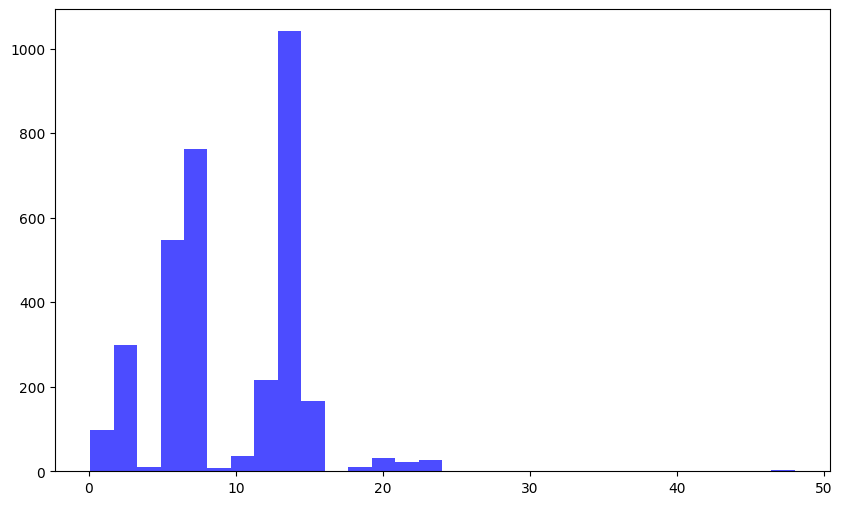

In [64]:
plt.figure(figsize=(10,6))
plt.hist(df['rear_camera_mp'], bins=30, color='blue', alpha=0.7);

Most of the Front-Camers fall in the Catagoery of 12 Mega Pixcel we can impute the Value using the same

In [65]:
# filling the missing values with the mode
mode_rear = df['rear_camera_mp'].mode()
print(mode_rear)
df['rear_camera_mp'].fillna(mode_rear, inplace=True)

0    13.0
Name: rear_camera_mp, dtype: float64


C:\Users\reply\AppData\Local\Temp\ipykernel_26292\1007354911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rear_camera_mp'].fillna(mode_rear, inplace=True)


In [66]:
df.isnull().sum()   

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are Some Missing values in the Columns like fron_camera_mp , internal_memory , ram , battery,weight
Creating a Fucntion to fix theese values

In [67]:
# Creating a Function to Fill the Missing Values
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            mode = df[col].mode()
            df[col].fillna(mode, inplace=True)
        else:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
    return df

In [68]:
df = fill_missing_values(df)

C:\Users\reply\AppData\Local\Temp\ipykernel_26292\2503577556.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)
C:\Users\reply\AppData\Local\Temp\ipykernel_26292\2503577556.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [69]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

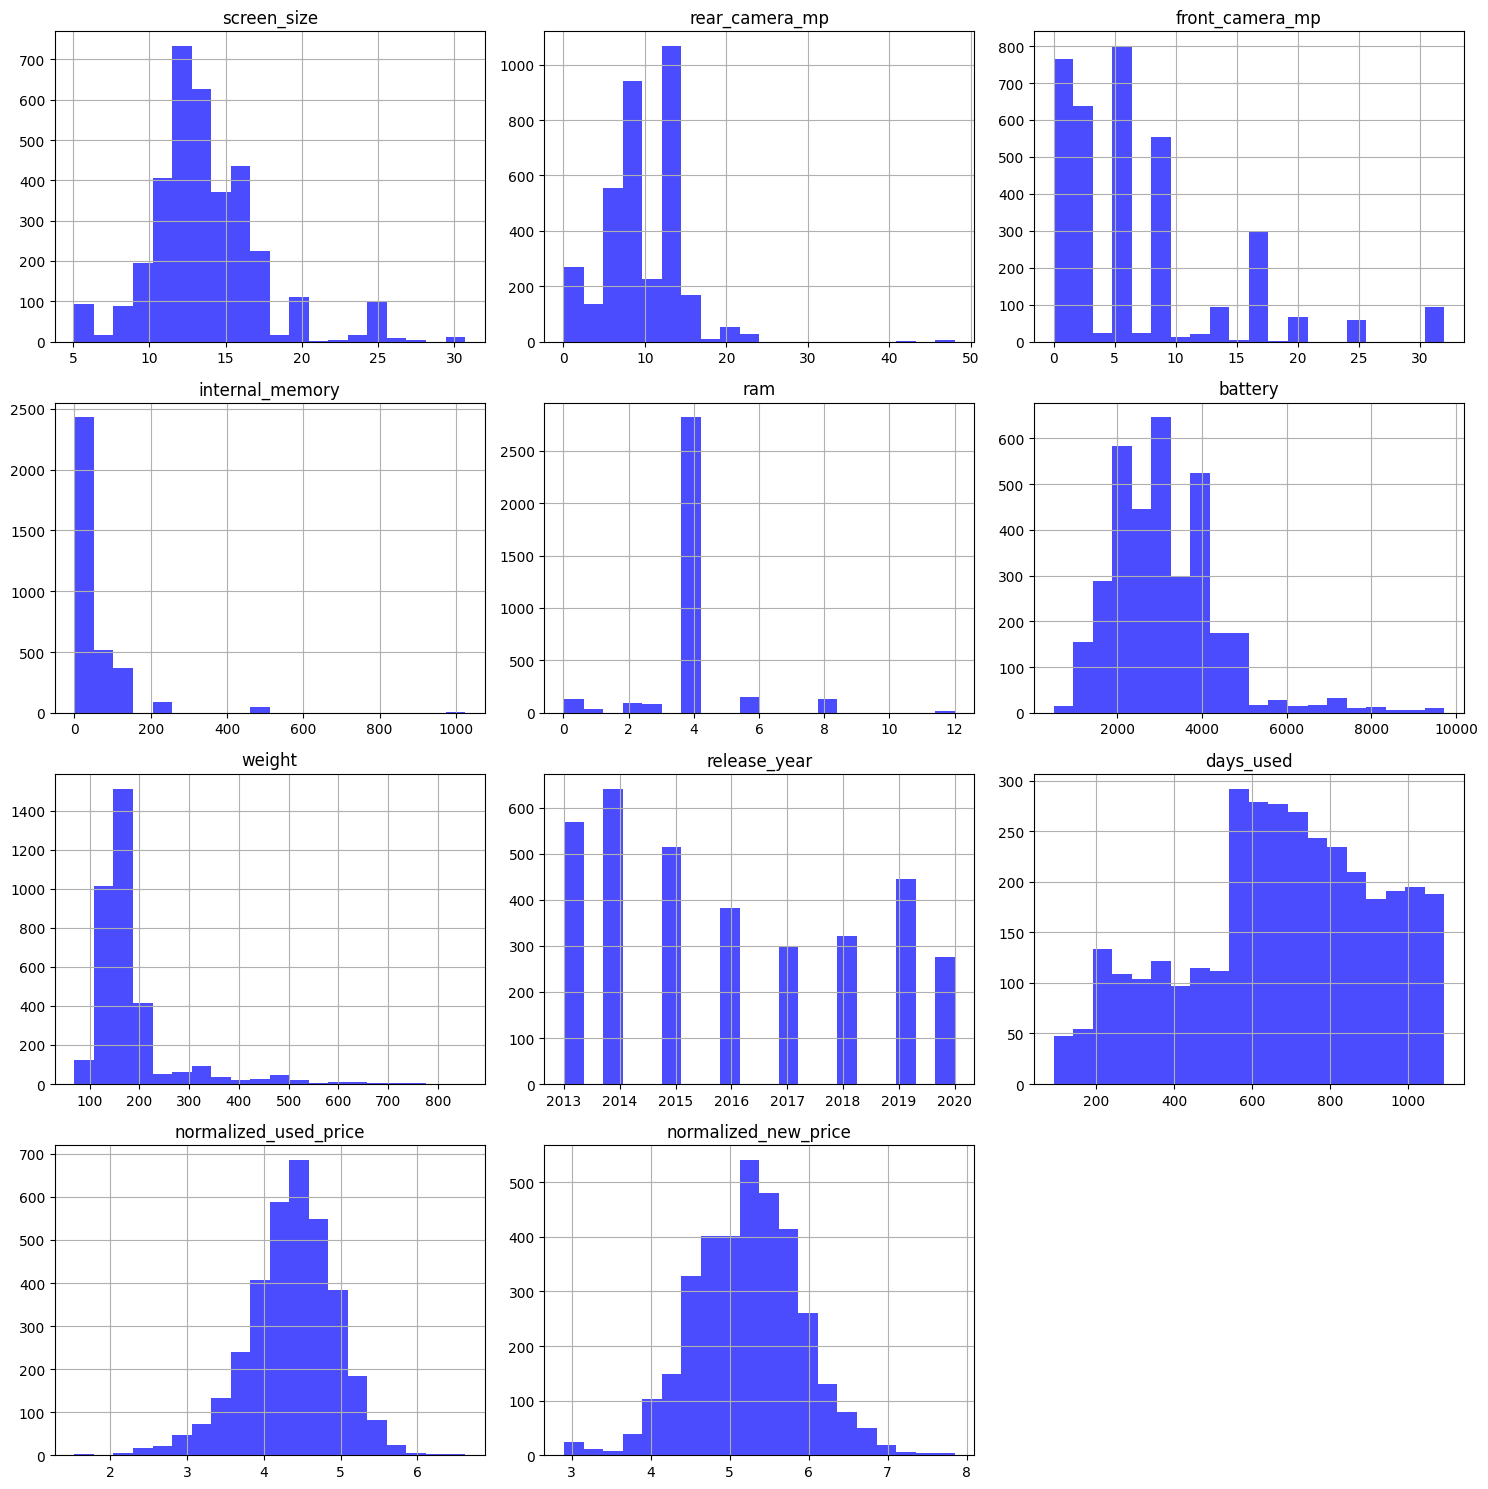

In [70]:
# Ploting all the Columns of the DataFrame to Get a Good idea 
df.hist(figsize=(15,15), bins=20, color='b', alpha=0.7)
plt.tight_layout()

In [71]:
# We Don't Need Normalised New Price Because that is of no Use so we are droping the column
df.drop('normalized_new_price', axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 377.9+ 

In [73]:
# Here we have 4 Catagorical Columns and rest  Numerical Columns
df['device_brand'].value_counts()

device_brand
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

In [74]:
df["os"].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 377.9+ 

In [77]:
# Defining the Catagorical Columns
cat_cols = ['device_brand', 'os' ]

In [106]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

def one_hot_encode_all_categoricals(df, encoder_filename='ohe_column_transformer.pkl'):
    """
    Applies One-Hot Encoding to all categorical columns in the DataFrame,
    saves the ColumnTransformer for future use, and returns the transformed DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with both categorical and numerical columns.
    - encoder_filename (str): Filename to save the fitted ColumnTransformer.

    Returns:
    - transformer (ColumnTransformer): Fitted ColumnTransformer object.
    - transformed_df (pd.DataFrame): Transformed DataFrame with encoded features.
    """

    # Step 1: Identify all categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Step 2: Define the ColumnTransformer
    transformer = ColumnTransformer(
        transformers=[
            ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ],
        remainder='passthrough'  # Keep the non-categorical columns as they are
    )

    # Step 3: Fit and Transform the data
    transformed_data = transformer.fit_transform(df)

    # Step 4: Get new column names for encoded features
    ohe_feature_names = transformer.named_transformers_['ohe'].get_feature_names_out(categorical_columns)
    all_feature_names = list(ohe_feature_names) + [col for col in df.columns if col not in categorical_columns]

    # Step 5: Convert to DataFrame
    transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names, index=df.index)

    # Step 6: Save the fitted transformer
    joblib.dump(transformer, encoder_filename)

    return transformer, transformed_df



ValueError: Shape of passed values is (3454, 1), indices imply (3454, 52)